Pearson r = 0.52   (p = 0.000e+00)


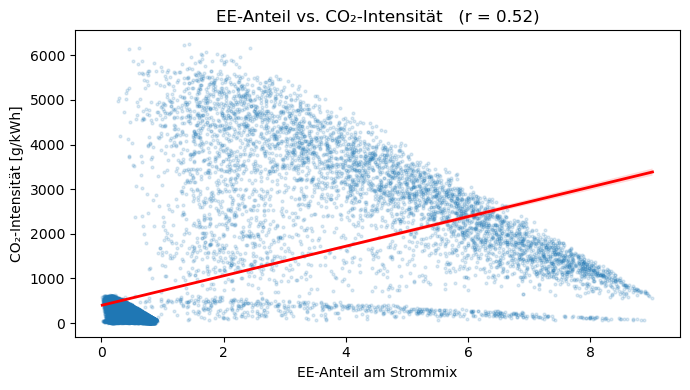

In [10]:
# =========================================================
# Scatter-Plot  EE-Anteil  vs.  CO₂-Intensität   (g / kWh)
# =========================================================
#
# ► Vorab: Excel als CSV speichern (Trennzeichen = Semikolon)
#   Screenshot-Spaltennamen werden 1-zu-1 verwendet.
#
# ---------------------------------------------------------
# 0) Bibliotheken
# ---------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# ---------------------------------------------------------
# 1) CSV einlesen  (Komma-Dezimal, Punkt-Tausender)
# ---------------------------------------------------------
csv_path = r"C:\Users\asus\Desktop\Masterarbeit\Realisierte Erzeugung\Strommix_mit_Emissionen_2325NEW.csv"

df = pd.read_csv(
    csv_path,
    sep=";",              # deutsches Semikolon
    decimal=",",          # Komma als Dezimalzeichen
    thousands=".",        # Punkt als Tausendertrenner
    parse_dates=["Datum von"],
    dayfirst=True
).set_index("Datum von")

# ---------------------------------------------------------
# 2) Erneuerbaren-Anteil pro Stunde
# ---------------------------------------------------------
ee_cols = ["Wind Onshore [MWh]", "Wind Offshore [MWh]",
           "Photovoltaik [MWh]", "Wasserkraft [MWh]", "Biomasse [MWh]"]

df["EE_Anteil"] = df[ee_cols].sum(axis=1) / df["Sum_MWh"]

# ---------------------------------------------------------
# 3) CO₂-Intensität   (g  /  kWh)
#    Sum_kg_CO2 stammt aus deiner Datei → von kg auf g/kWh
# ---------------------------------------------------------
df["CO2_g_per_kWh"] = (df["Sum_kg_CO2"] * 1000) / df["Sum_MWh"]

# ---------------------------------------------------------
# 4) Pearson-Korrelation
# ---------------------------------------------------------
r, p = pearsonr(df["EE_Anteil"], df["CO2_g_per_kWh"])
print(f"Pearson r = {r:.2f}   (p = {p:.3e})")

# ---------------------------------------------------------
# 5) Scatter-Plot  +  lineare Regressionslinie
# ---------------------------------------------------------
plt.figure(figsize=(7,4))
sns.regplot(
    data=df,
    x="EE_Anteil",
    y="CO2_g_per_kWh",
    scatter_kws={"s":4, "alpha":0.15},
    line_kws={"color":"red", "lw":2},
    ci=95
)
plt.xlabel("EE-Anteil am Strommix")
plt.ylabel("CO₂-Intensität [g/kWh]")
plt.title(f"EE-Anteil vs. CO₂-Intensität   (r = {r:.2f})")
plt.tight_layout()
plt.show()
